카운팅 된 사람의 수 :  5


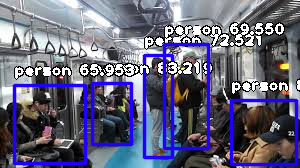

In [10]:
import cv2
import numpy as np
import PIL.Image as pilimg
from IPython.display import Image

import matplotlib.pyplot as plt # 결과 확인을 위해 시각화

from imageai.Detection import ObjectDetection

import os

execution_path = os.getcwd()

####
img_txt = 'test02.jpg'
####

detector = ObjectDetection()
detector.setModelTypeAsRetinaNet()
detector.setModelPath(os.path.join(execution_path , "resnet50_coco_best_v2.0.1.h5"))
detector.loadModel()
custom_objects = detector.CustomObjects(person=True, cat=False)

detections = detector.detectCustomObjectsFromImage(input_image=
                                                   os.path.join(execution_path ,img_txt), 
                                                   output_image_path=os.path.join(execution_path , "image_new.png"), 
                                                   custom_objects=custom_objects, minimum_percentage_probability=65)

cnt = 0
for eachObject in detections:
    cnt = cnt + 1
#print(detections)

print("카운팅 된 사람의 수 : ", cnt)
Image("image_new.png")

In [11]:
from PIL import Image

# img_txt = 'tt02.jpg'

def image_binaryzation():
    img_source = cv2.imread(img_txt,0)

    ret, img_result1 = cv2.threshold(img_source, 127, 255,cv2.THRESH_BINARY)

    img_source = Image.open(img_txt)
    img_size = img_source.size
    im_w = img_size[0]
    im_h = img_size[1]

    print(im_w, "     ", im_h)

    im_w = len(img_result1[0])
    im_h = len(img_result1)

    print(im_w, "     ", im_h)
    return img_result1, im_w, im_h  

def empty_space_count(img_result1): # img_result1은 이진화가 진행된 이미지다.
    cnt1 = 0
    for i in img_result1:
        for j in img_result1[0]:
            if j != 0:
                cnt1 = cnt1 + 1

    print("Empty Sapce Rate : ", int((cnt1 / (im_w*im_h))*100), "%")
    return int((cnt1 / (im_w*im_h))*100)

def cut_image(img_result1):
    cutted_img = img_result1[int(im_w*0.1) : im_w, 200 : im_h] # 조명 처리를 위해
                                                                # 이미지 자르는 부분
    ###
#     cv2.imshow("THRESH_BINARY2", cutted_img)
#     plt.imshow(cutted_img)
#     print("이거 실행함?")
    ###
    empty_rate = empty_space_count(cutted_img)
    return empty_rate

def state_test(state):
    if state > 70 :
        print("원활 : ", cnt)
    elif state > 20:
        print("혼잡 : ", cnt)
    else:
        print("만석 : ", cnt)
        
########## main
if __name__ == "__main__":
    if cnt < 3:
        print("[원활]:count less than 3")
    else:
        img_result1, im_w, im_h = image_binaryzation()
        state_test(empty_space_count(img_result1)) # 빈 공간 비율(처리 전)

        # state_test(cut_image(img_result1)) # 빈 공간 비율(처리 후)
    
        #cv2.imshow("SOURCE", img_source) # 원본이미지
        cv2.imshow("THRESH_BINARY", img_result1) # 이진화 이미지
        #cv2.imshow("THRESH_BINARY_INV", img_result2) # 이진화 반전 이미지

        cv2.waitKey(0)
        cv2.destroyAllWindows()
########## 

300       168
300       168
Empty Sapce Rate :  81 %
원활 :  5
